In [1]:
import keras
import numpy as np
import pickle

Using TensorFlow backend.


In [2]:
from keras import layers
from keras import models
from keras import backend
from keras import optimizers
from keras import regularizers
from sklearn.model_selection import train_test_split

In [5]:
with open('data/data.pkl', 'rb') as f:
    data = pickle.load(f)

x = data['x']
y = data['y']
print(x.shape)
print(y.shape)

NUM_GENRES= y.shape[1]

print(NUM_GENRES)
print(y.sum(axis=0))

(2420, 862, 128)
(2420, 3)
3
[1094.  678.  648.]


In [6]:
print(np.amax(x))
print(np.amin(x))

6.272013
-96.657776


In [129]:
#x = (x-np.amin(x))/(np.amax(x)-np.amin(x))

In [130]:
print(np.amax(x))
print(np.amin(x))

10.309701
-89.144424


In [7]:
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.2,
        random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


# How many songs by class
print(y_train.sum(axis=0))
print(y_test.sum(axis=0))

(1936, 862, 128)
(484, 862, 128)
(1936, 3)
(484, 3)
[864. 544. 528.]
[230. 134. 120.]


Model from deepsound.io

In [8]:
print('Building model...')

n_features = x_train.shape[2]
input_shape = (None, n_features)
model_input = layers.Input(input_shape, name='input')
layer = model_input
for i in range(3):
    # second convolutional layer names are used by extract_filters.py
    layer = layers.Convolution1D(
            filters=256,
            kernel_size=5,
            name='convolution_' + str(i + 1)
        )(layer)
    layer = layers.BatchNormalization(momentum=0.9)(layer)
    layer = layers.Activation('relu')(layer)
    layer = layers.MaxPooling1D(2)(layer)
    layer = layers.Dropout(0.5)(layer)

layer = layers.TimeDistributed(layers.Dense(NUM_GENRES))(layer)
time_distributed_merge_layer = layers.Lambda(
        function=lambda x: backend.mean(x, axis=1),
        output_shape=lambda shape: (shape[0],) + shape[2:],
        name='output_merged'
    )
layer = time_distributed_merge_layer(layer)
layer = layers.Activation('softmax', name='output_realtime')(layer)
model_output = layer
model = models.Model(model_input, model_output)
opt = optimizers.Adam(lr=0.001)
model.compile(
        loss='categorical_crossentropy',
        optimizer=opt,
        metrics=['accuracy']
    )

print('Training...')
history = model.fit(
    x_train, y_train, batch_size=32, nb_epoch=100,
    validation_data=(x_test, y_test), verbose=1, callbacks=[
        keras.callbacks.ModelCheckpoint(
            'models/model_salsa.h5', save_best_only=True, monitor='val_acc', verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_acc', factor=0.5, patience=10, min_delta=0.01,
            verbose=1
        )
    ]
)

Building model...
Training...


/home/icesi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1936 samples, validate on 484 samples
Epoch 1/100
1936/1936 [==============================] - 13s 7ms/step - loss: 1.1595 - acc: 0.4143 - val_loss: 1.0891 - val_acc: 0.4690

Epoch 00001: val_acc improved from -inf to 0.46901, saving model to models/model_salsa.h5
Epoch 2/100
1936/1936 [==============================] - 2s 854us/step - loss: 1.0898 - acc: 0.4339 - val_loss: 1.0543 - val_acc: 0.4752

Epoch 00002: val_acc improved from 0.46901 to 0.47521, saving model to models/model_salsa.h5
Epoch 3/100
1936/1936 [==============================] - 2s 863us/step - loss: 1.0881 - acc: 0.4329 - val_loss: 1.0763 - val_acc: 0.4731

Epoch 00003: val_acc did not improve from 0.47521
Epoch 4/100
1936/1936 [==============================] - 2s 847us/step - loss: 1.0760 - acc: 0.4530 - val_loss: 1.0645 - val_acc: 0.4649

Epoch 00004: val_acc did not improve from 0.47521
Epoch 5/100
1936/1936 [==============================] - 2s 845us/step - loss: 1.0805 - acc: 0.4494 - val_loss: 1.0542 

1936/1936 [==============================] - 2s 835us/step - loss: 0.8061 - acc: 0.6343 - val_loss: 1.4601 - val_acc: 0.4194

Epoch 00042: val_acc did not improve from 0.47521
Epoch 43/100
1936/1936 [==============================] - 2s 836us/step - loss: 0.7737 - acc: 0.6570 - val_loss: 1.3091 - val_acc: 0.3926

Epoch 00043: val_acc did not improve from 0.47521
Epoch 44/100
1936/1936 [==============================] - 2s 831us/step - loss: 0.7789 - acc: 0.6560 - val_loss: 1.4291 - val_acc: 0.3988

Epoch 00044: val_acc did not improve from 0.47521
Epoch 45/100
1936/1936 [==============================] - 2s 825us/step - loss: 0.7744 - acc: 0.6632 - val_loss: 1.3490 - val_acc: 0.4050

Epoch 00045: val_acc did not improve from 0.47521
Epoch 46/100
1936/1936 [==============================] - 2s 856us/step - loss: 0.7673 - acc: 0.6601 - val_loss: 1.4095 - val_acc: 0.4277

Epoch 00046: val_acc did not improve from 0.47521
Epoch 47/100
1936/1936 [==============================] - 2s 830us/s


Epoch 00083: val_acc did not improve from 0.47521
Epoch 84/100
1936/1936 [==============================] - 2s 834us/step - loss: 0.6743 - acc: 0.7159 - val_loss: 1.4301 - val_acc: 0.4380

Epoch 00084: val_acc did not improve from 0.47521
Epoch 85/100
1936/1936 [==============================] - 2s 860us/step - loss: 0.6713 - acc: 0.7164 - val_loss: 1.4216 - val_acc: 0.4463

Epoch 00085: val_acc did not improve from 0.47521
Epoch 86/100
1936/1936 [==============================] - 2s 852us/step - loss: 0.6687 - acc: 0.7154 - val_loss: 1.4062 - val_acc: 0.4463

Epoch 00086: val_acc did not improve from 0.47521
Epoch 87/100
1936/1936 [==============================] - 2s 831us/step - loss: 0.6731 - acc: 0.7071 - val_loss: 1.4286 - val_acc: 0.4442

Epoch 00087: val_acc did not improve from 0.47521
Epoch 88/100
1936/1936 [==============================] - 2s 843us/step - loss: 0.6737 - acc: 0.7107 - val_loss: 1.4376 - val_acc: 0.4380

Epoch 00088: val_acc did not improve from 0.47521
Epoc

range(0, 100)


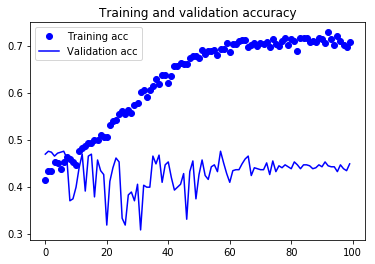

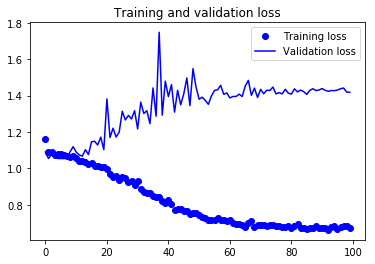

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Maximum validation accuracy in 100 epochs: 0.17715

In [11]:
model = models.Sequential()
model.add(layers.Convolution1D(256, 5, padding='same',kernel_regularizer=regularizers.l2(0.02),
                        input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Convolution1D(256, 5, padding='same',kernel_regularizer=regularizers.l2(0.02)))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Convolution1D(256, 5, padding='same',kernel_regularizer=regularizers.l2(0.02)))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.2))
model.add(layers.Convolution1D(256, 5, padding='same',kernel_regularizer=regularizers.l2(0.02)))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.2))
model.add(layers.TimeDistributed(layers.Dense(128, activation='relu')))
model.add(layers.Dropout(0.75))
model.add(layers.TimeDistributed(layers.Dense(NUM_GENRES, activation='softmax')))
time_distributed_merge_layer = layers.Lambda(
            function=lambda x: backend.mean(x, axis=1),
            output_shape=lambda shape: (shape[0],) + shape[2:],
            name='output_merged'
        )
model.add(time_distributed_merge_layer)

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 862, 256)          164096    
_________________________________________________________________
batch_normalization_8 (Batch (None, 862, 256)          1024      
_________________________________________________________________
activation_8 (Activation)    (None, 862, 256)          0         
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 431, 256)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 431, 256)          327936    
_________________________________________________________________
batch_normalization_9 (Batch (None, 431, 256)          1024      
_________________________________________________________________
activation_9 (Activation)    (None, 431, 256)          0         
__________

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Train on 1548 samples, validate on 388 samples
Epoch 1/50
1548/1548 [==============================] - 3s 2ms/step - loss: 19.2304 - acc: 0.3753 - val_loss: 18.4734 - val_acc: 0.4330
Epoch 2/50
1548/1548 [==============================] - 1s 892us/step - loss: 17.6361 - acc: 0.4477 - val_loss: 16.8939 - val_acc: 0.4330
Epoch 3/50
1548/1548 [==============================] - 1s 893us/step - loss: 16.1831 - acc: 0.4567 - val_loss: 15.5222 - val_acc: 0.4278
Epoch 4/50
1548/1548 [==============================] - 1s 888us/step - loss: 14.8573 - acc: 0.4619 - val_loss: 14.2598 - val_acc: 0.4227
Epoch 5/50
1548/1548 [==============================] - 1s 804us/step - loss: 13.6564 - acc: 0.4612 - val_loss: 13.1493 - val_acc: 0.4098
Epoch 6/50
1548/1548 [==============================] - 1s 895us/step - loss: 12.5738 - acc: 0.4722 - val_loss: 12.1818 - val_acc: 0.4356
Epoch 7/50
1548/1548 [==============================] - 1s 900us/step - loss: 11.5874 - acc: 0.4755 - val_loss: 11.2097 - val_a

range(0, 50)


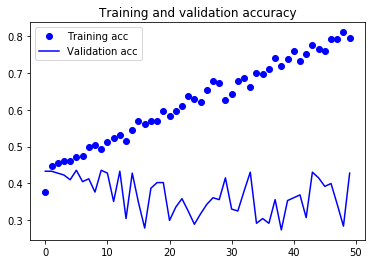

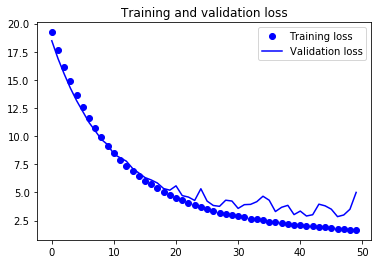

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# x = (x-np.amin(x))/(np.amax(x)-np.amin(x))

In [23]:
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)

In [30]:
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.2,
        random_state=42)
x_test.shape

(484, 862, 128, 1)

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), padding='same', name='conv1',
                        input_shape=(x_train.shape[1], x_train.shape[2], 1)))
model.add(layers.BatchNormalization(axis=3, name='bn1'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool1'))
model.add(layers.Dropout(0.1, name='dropout1'))

model.add(layers.Conv2D(128, (3, 3), padding='same', name='conv2'))
model.add(layers.BatchNormalization(axis=3, name='bn2'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), name='pool2'))
model.add(layers.Dropout(0.1, name='dropout2'))

model.add(layers.Conv2D(128, (3, 3), padding='same', name='conv3'))
model.add(layers.BatchNormalization(axis=3, name='bn3'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4), name='pool3'))
model.add(layers.Dropout(0.1, name='dropout3'))

model.add(layers.Flatten())

model.add(layers.Dropout(0.3, name='dropout_final'))

model.add(layers.Dense(NUM_GENRES, activation='softmax', name='output'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 862, 128, 64)      640       
_________________________________________________________________
bn1 (BatchNormalization)     (None, 862, 128, 64)      256       
_________________________________________________________________
activation_17 (Activation)   (None, 862, 128, 64)      0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 431, 64, 64)       0         
_________________________________________________________________
dropout1 (Dropout)           (None, 431, 64, 64)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 431, 64, 128)      73856     
_________________________________________________________________
bn2 (BatchNormalization)     (None, 431, 64, 128)      512       
__________

In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.00000001),
              metrics=['acc'])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Train on 1548 samples, validate on 388 samples
Epoch 1/100
1548/1548 [==============================] - 12s 8ms/step - loss: 2.2541 - acc: 0.3327 - val_loss: 1.2453 - val_acc: 0.4124
Epoch 2/100
1548/1548 [==============================] - 11s 7ms/step - loss: 2.2843 - acc: 0.3430 - val_loss: 1.2448 - val_acc: 0.4124
Epoch 3/100
1548/1548 [==============================] - 11s 7ms/step - loss: 2.1763 - acc: 0.3611 - val_loss: 1.2437 - val_acc: 0.4098- loss: 2.2086 - acc: 0
Epoch 4/100
1548/1548 [==============================] - 11s 7ms/step - loss: 2.2695 - acc: 0.3398 - val_loss: 1.2429 - val_acc: 0.4098
Epoch 5/100
1548/1548 [==============================] - 11s 7ms/step - loss: 2.2224 - acc: 0.3463 - val_loss: 1.2406 - val_acc: 0.4098
Epoch 6/100
1548/1548 [==============================] - 11s 7ms/step - loss: 2.2480 - acc: 0.3501 - val_loss: 1.2398 - val_acc: 0.4098
Epoch 7/100
1548/1548 [==============================] - 11s 7ms/step - loss: 2.2315 - acc: 0.3346 - val_loss: 1.2

1548/1548 [==============================] - 11s 7ms/step - loss: 2.0126 - acc: 0.3682 - val_loss: 1.2195 - val_acc: 0.4201
Epoch 59/100
1548/1548 [==============================] - 11s 7ms/step - loss: 2.0835 - acc: 0.3553 - val_loss: 1.2195 - val_acc: 0.4175
Epoch 60/100
1548/1548 [==============================] - 11s 7ms/step - loss: 2.0576 - acc: 0.3450 - val_loss: 1.2196 - val_acc: 0.4175
Epoch 61/100
1548/1548 [==============================] - 11s 7ms/step - loss: 2.0772 - acc: 0.3585 - val_loss: 1.2196 - val_acc: 0.4175
Epoch 62/100
1548/1548 [==============================] - 11s 7ms/step - loss: 2.0447 - acc: 0.3501 - val_loss: 1.2197 - val_acc: 0.4227
Epoch 63/100
1548/1548 [==============================] - 11s 7ms/step - loss: 2.1074 - acc: 0.3559 - val_loss: 1.2200 - val_acc: 0.4227
Epoch 64/100
1548/1548 [==============================] - 11s 7ms/step - loss: 2.1570 - acc: 0.3295 - val_loss: 1.2202 - val_acc: 0.42539 - acc: 
Epoch 65/100
1548/1548 [=====================

range(0, 100)


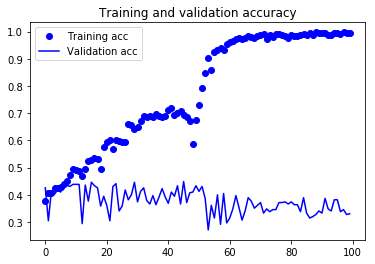

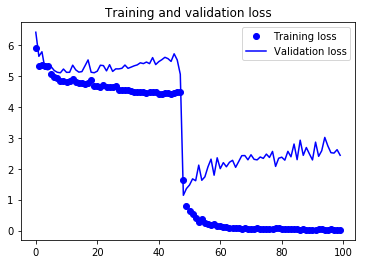

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()